In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import linalg
EPSILON = 1.1920929e-07
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import Parallel, delayed
import scanpy as sc
import pandas as pd
import spatialdm as sdm
import squidpy as sq
import tqdm
import adjustText
from scipy.optimize import minimize, minimize_scalar
from sklearn.neighbors import NearestNeighbors
import importlib

In [3]:
import sys
sys.path.append("/Users/hs0424/Workspace/copulacci/src/copulacci/")
import cci
import spatial
import model
import simulation

In [4]:
data_dir = '/Users/hs0424/Workspace/copulacci/notebook/orator_paper_notebook/data/human_breast_visium/pvalue_results_all/'

In [6]:
import glob

In [7]:
gpairs_selected = [g.split('/')[-1].replace('final_res_copula_','').replace('.csv','') for g in glob.glob(data_dir + '/*.csv')]

In [8]:
gpairs_selected

['Invasive=Invasive',
 'Tumor=Surrounding tumor',
 'Tumor=Healthy',
 'Surrounding tumor=Tumor',
 'Healthy=Healthy',
 'Surrounding tumor=Surrounding tumor',
 'Tumor=Invasive',
 'Healthy=Invasive',
 'Healthy=Surrounding tumor',
 'Tumor=Tumor',
 'Invasive=Surrounding tumor',
 'Surrounding tumor=Invasive',
 'Surrounding tumor=Healthy',
 'Invasive=Tumor',
 'Invasive=Healthy',
 'Healthy=Tumor']

In [9]:
import os
dfs = []
for gpair in gpairs_selected:
    file_name = 'final_res_copula_' + gpair + '.csv'
    tmp = pd.read_csv(
        os.path.join(data_dir, file_name),
    )
    tmp.loc[:, 'gpair'] = gpair
    dfs += [tmp.copy()]

In [10]:
cop_sig_df = pd.concat(dfs, axis=0)

cop_sig_df['source'] = cop_sig_df.celltype_direction.str.split("=").str[0]
cop_sig_df['target'] = cop_sig_df.celltype_direction.str.split("=").str[1]

In [11]:
cop_sig_df

,copula_coeff,mu_x,mu_y,copula_method,lig_rec,pval,qval,celltype_direction,gpair,source,target
0,0.227277,-8.085026,-8.241622,copula,EFNB1_EPHB2,0.000000,0.000000,Invasive=Invasive,Invasive=Invasive,Invasive,Invasive
1,0.276812,-7.922171,-7.854302,copula,LCK_CD8A_CD8B1,0.000000,0.000000,Invasive=Invasive,Invasive=Invasive,Invasive,Invasive
2,0.129629,-7.169738,-5.889023,copula,DSC2_DSG2,0.000000,0.000000,Invasive=Invasive,Invasive=Invasive,Invasive,Invasive
3,0.108365,-4.636646,-5.027738,copula,CDH1_ITGA1_ITGB1,0.000000,0.000000,Invasive=Invasive,Invasive=Invasive,Invasive,Invasive
4,0.108342,-7.664272,-8.351699,copula,JAG1_NOTCH4,0.000000,0.000000,Invasive=Invasive,Invasive=Invasive,Invasive,Invasive
...,...,...,...,...,...,...,...,...,...,...,...
36,0.742782,-7.729692,-7.064218,copula,PDGFA_PDGFRB,0.037924,0.097181,Healthy=Tumor,Healthy=Tumor,Healthy,Tumor
37,0.627349,-7.047006,-8.540942,copula,VEGFA_VEGFR1,0.099800,0.151549,Healthy=Tumor,Healthy=Tumor,Healthy,Tumor
38,0.603769,-5.547302,-8.267901,copula,CCL5_CCR1,0.017964,0.073653,Healthy=Tumor,Healthy=Tumor,Healthy,Tumor
39,0.695205,-6.885020,-8.123089,copula,CCL2_ACKR1,0.005988,0.049102,Healthy=Tumor,Healthy=Tumor,Healthy,Tumor


In [28]:
ct = 'Surrounding tumor'
cop_sig_df_tumor = cop_sig_df.loc[
    ((cop_sig_df.source == ct) | (cop_sig_df.target == ct))
].copy()

In [36]:
cop_sig_df_tumor.loc[cop_sig_df_tumor.lig_rec == 'CXCL11_CXCR3']

,copula_coeff,mu_x,mu_y,copula_method,lig_rec,pval,qval,celltype_direction,gpair,source,target
48,0.381707,-7.775838,-8.316783,copula,CXCL11_CXCR3,0.0,0.0,Tumor=Surrounding tumor,Tumor=Surrounding tumor,Tumor,Surrounding tumor


In [29]:
import importlib

In [30]:
import gseapy_like_plot as pl

p_inv


<Axes: xlabel='celltype_direction'>

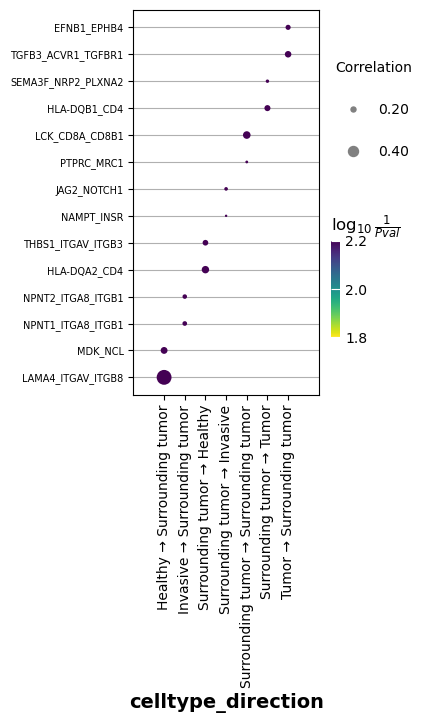

In [37]:
pl.dotplot(
    cop_sig_df_tumor,
    columns = 'qval',
    x = 'celltype_direction',
    y = 'lig_rec',
    xlabelsize=10,
    ylabelsize=7,
    figsize=(3,5),
    xticklabels_rot=90,
    show_ligrec_dir=False,
    top_term=2,
    cutoff=0.1,
    size=3,
)

In [46]:
df = cop_sig_df_tumor.copy()

In [50]:
df.head()

,copula_coeff,mu_x,mu_y,copula_method,lig_rec,pval,qval,celltype_direction,gpair,source,target
0,0.205906,-7.786452,-6.973975,copula,EFNB1_EPHB4,0.000000,0.000000,Tumor=Surrounding tumor,Tumor=Surrounding tumor,Tumor,Surrounding tumor
1,0.195600,-7.346011,-7.980732,copula,ICAM1_SPN,0.001996,0.006520,Tumor=Surrounding tumor,Tumor=Surrounding tumor,Tumor,Surrounding tumor
2,0.169011,-7.065552,-6.477932,copula,DSC2_DSG2,0.009980,0.020376,Tumor=Surrounding tumor,Tumor=Surrounding tumor,Tumor,Surrounding tumor
3,0.193867,-7.698235,-7.460963,copula,ITGA4_ITGB7_VCAM1,0.019960,0.028766,Tumor=Surrounding tumor,Tumor=Surrounding tumor,Tumor,Surrounding tumor
4,0.344698,-8.038344,-8.150764,copula,SELPLG_SELL,0.097804,0.104183,Tumor=Surrounding tumor,Tumor=Surrounding tumor,Tumor,Surrounding tumor


In [39]:
colname = 'qval'
isfloat = True
thresh = 0.1
n_terms = 2
value_column = 'copula_coeff'
x = 'celltype_direction'
y = 'lig_rec'
def isfloat(x):
    try:
        float(x)
    except:
        return False
    else:
        return True

In [40]:
can_be_coerced = df[colname].map(isfloat).sum()
if can_be_coerced < len(df):
    msg = "some value in %s could not be typecast to `float`" % colname
    raise ValueError(msg)
# subset
mask = df[colname] <= thresh
if colname in ["Combined Score", "NES", "ES", "Odds Ratio"]:
    mask.loc[:] = True

df = df.loc[mask]
if len(df) < 1:
    msg = "Warning: No enrich terms when cutoff = %s" % thresh
    raise ValueError(msg)
cbar_title = colname
# clip GSEA lower bounds
# if self.colname in ["NOM p-val", "FDR q-val"]:
#     df[self.colname].clip(1e-5, 1.0, inplace=True)
# sorting the dataframe for better visualization
colnd = {
    "qval": "FDR",
    "pval": "Pval"
}
if colname in ["pval", "qval"]:
    # get top_terms
    df = df.sort_values(by=colname)
    df[colname].replace(
        0, method="bfill", inplace=True
    )  ## asending order, use bfill
    df = df.assign(p_inv=np.log10(1 / df[colname].astype(float)))
    _t = colnd[colname]
    colname = "p_inv"
    cbar_title = r"$\log_{10} \frac{1}{ " + _t + " }$"

# get top terms; sort ascending
if (x is not None) and (x in df.columns):
    # get top term of each group
    df = (
        df.groupby(x)
        .apply(lambda _x: _x.sort_values(by=colname).tail(n_terms))
        .reset_index(drop=True)
    )
else:
    df = df.sort_values(by=colname).tail(n_terms)  # acending
# get scatter area
if df.columns.isin([value_column]).any():
    ol = df.columns[df.columns.isin([value_column])]
    
    df = df.assign(Hits_ratio=df[ol].values)
else:
    df = df.assign(Hits_ratio=1.0)  # if Overlap column missing

# remove rows with inf
df = df[~df.isin([np.inf, -np.inf]).any(axis=1)]

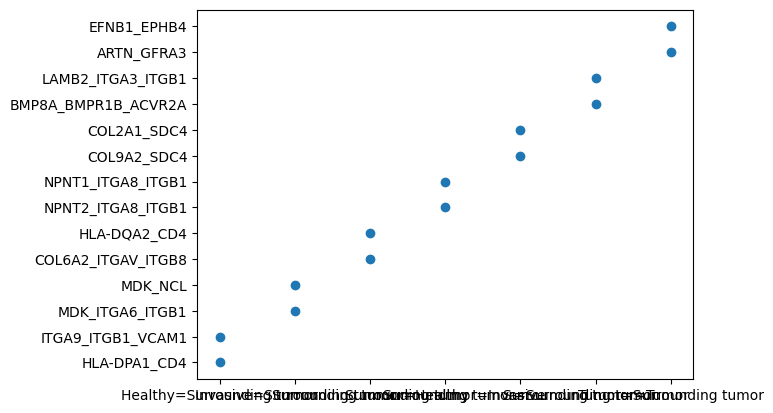

In [44]:
plt.scatter(df.celltype_direction, df.lig_rec)

In [45]:
df

,copula_coeff,mu_x,mu_y,copula_method,lig_rec,pval,qval,celltype_direction,gpair,source,target,p_inv,Hits_ratio
0,0.300601,-4.811655,-6.372784,copula,HLA-DPA1_CD4,0.0,0.002528,Healthy=Surrounding tumor,Healthy=Surrounding tumor,Healthy,Surrounding tumor,2.597175,0.300601
1,0.189239,-5.380994,-6.910764,copula,ITGA9_ITGB1_VCAM1,0.0,0.002528,Healthy=Surrounding tumor,Healthy=Surrounding tumor,Healthy,Surrounding tumor,2.597175,0.189239
2,0.105984,-5.036885,-5.184635,copula,MDK_ITGA6_ITGB1,0.0,0.002528,Invasive=Surrounding tumor,Invasive=Surrounding tumor,Invasive,Surrounding tumor,2.597175,0.105984
3,0.131975,-5.035840,-4.980396,copula,MDK_NCL,0.0,0.002528,Invasive=Surrounding tumor,Invasive=Surrounding tumor,Invasive,Surrounding tumor,2.597175,0.131975
4,0.261183,-4.320789,-6.179014,copula,COL6A2_ITGAV_ITGB8,0.0,0.002528,Surrounding tumor=Healthy,Surrounding tumor=Healthy,Surrounding tumor,Healthy,2.597175,0.261183
5,0.296838,-6.003799,-6.838702,copula,HLA-DQA2_CD4,0.0,0.002528,Surrounding tumor=Healthy,Surrounding tumor=Healthy,Surrounding tumor,Healthy,2.597175,0.296838
6,0.129031,-6.654591,-5.217369,copula,NPNT2_ITGA8_ITGB1,0.0,0.002528,Surrounding tumor=Invasive,Surrounding tumor=Invasive,Surrounding tumor,Invasive,2.597175,0.129031
7,0.126982,-6.652896,-5.217281,copula,NPNT1_ITGA8_ITGB1,0.0,0.002528,Surrounding tumor=Invasive,Surrounding tumor=Invasive,Surrounding tumor,Invasive,2.597175,0.126982
8,0.151257,-6.020294,-5.188342,copula,COL9A2_SDC4,0.0,0.002528,Surrounding tumor=Surrounding tumor,Surrounding tumor=Surrounding tumor,Surrounding tumor,Surrounding tumor,2.597175,0.151257
9,0.174761,-7.121230,-5.193526,copula,COL2A1_SDC4,0.0,0.002528,Surrounding tumor=Surrounding tumor,Surrounding tumor=Surrounding tumor,Surrounding tumor,Surrounding tumor,2.597175,0.174761
